# Cover

**Title:** NN Project

**Subject:** Collective Intelligence

**Professors:** Sylvain Cussat-Blanc

**Writers:** 

*   Fitzgibbon, Declan - 21912679
*   Quintero, Reynaldo - 21912040
*   Yang, Wenhan - 21911370

**Location:** 
31200 Toulouse, France. Université Toulouse I Capitole. 

**Year of creation**: 2020.

# First approach to the dataset

The first step taken to start this project was the visualization of the given dataset.

Said dataset was given in a csv format and consisted in:

>1.   **ID:** ID of the subject. (Integer number)
>2.   **Sex** (Integer number: 1 or 2)
>3.   **Age** (Float number representing the years, months and dates)
>4.   **I1:** URL of the tooth I1 (String).
>5.   **I2:** URL of the tooth I2 (String).
>6.   **C:** URL of the tooth C (String).
>7.   **PM1:** URL of the tooth PM1 (String).
>8.   **PM2:** URL of the tooth PM2 (String).
>9.   **M1:** URL of the tooth M1 (String).
>10.  **M2:** URL of the tooth M2 (String).
>11.  **38:** URL of the tooth 38 (String).
>12.  **18:** URL of the tooth 18 (String).
>13.  **28:** URL of the tooth 28 (String).
>14.  **48:** URL of the tooth 48 (String).


The legend for the different teeth are as follows:

>-   **I1**: Right lower incisive.
>-   **I2**: Left lower incisive
>-   **C**: left lower canine.
>-   **PM1**: left lower rightmost premolar.
>-   **PM2**: left lower leftmost premolar.
>-   **M1**: left lower rightmost molar.
>-   **M2**: left lower leftmost molar.
>-   **38**: left lower wisdom tooth.
>-   **18**: right upper wisdom tooth.
>-   **28**: left upper wisdom tooth.
>-   **48**: right lower wisdom tooth.

A folder with the pictures of the teeth for each patient was also provided.

# Function declaration

In [ ]:
from PIL import Image

#Defining functions that we will use throughout the Notebook

# Function to check if a specific variable is NaN
def isNaN(string):
    return string != string


# Function that treats each line of the described dataset, searches the images in the drive repository, transforms them into an RGB vector, and fuses them together 
def img_process(data):

  # Initialization of variables
  path = '/content/drive/MyDrive/orig'
  data_combined = []
  count = 0

  # Line by line of the dataset, we check each field and transform it as described.
  for line in data.values:
    if line[0] == 1:
      sex = np.full((30, 40, 3), 0)
    else:
      sex = np.full((30, 40, 3), 255)
    if not isNaN(line[1]):
      if line[1] != 'idt1232_utl3_I1_1_12_H.jpg': #no such image
        I1 = Image.open(path + '/I1/' + line[1])
        I1 = I1.resize((40, 30))
        I1 = np.array(I1)
      else:
        I1 = np.full((30, 40, 3), -255)
    else:
      I1 = np.full((30, 40, 3), -255)
    if not isNaN(line[2]):
      I2 = Image.open(path + '/I2/' + line[2])
      I2 = I2.resize((40, 30))
      I2 = np.array(I2)
    else:
      I2 = np.full((30, 40, 3), -255)
    if not isNaN(line[3]):
      C = Image.open(path + '/C1/' + line[3])
      C = C.resize((40, 30))
      C = np.array(C)
    else:
      C = np.full((30, 40, 3), -255)
    if not isNaN(line[4]):
      PM1 = Image.open(path + '/PM1/' + line[4])
      PM1 = PM1.resize((40, 30))
      PM1 = np.array(PM1)
    else:
      PM1 = np.full((30, 40, 3), -255)
    if not isNaN(line[5]):
      PM2 = Image.open(path + '/PM2/' + line[5])
      PM2 = PM2.resize((40, 30))
      PM2 = np.array(PM2)
    else:
      PM2 = np.full((30, 40, 3), -255)
    if not isNaN(line[6]):
      M1 = Image.open(path + '/M1/' + line[6])
      M1 = M1.resize((40, 30))
      M1 = np.array(M1)
    else:
      M1 = np.full((30, 40, 3), -255)
    if not isNaN(line[7]):
      M2 = Image.open(path + '/M2/' + line[7])
      M2 = M2.resize((40, 30))
      M2 = np.array(M2)
    else:
      M2 = np.full((30, 40, 3), -255)
    if not isNaN(line[8]):
      T_38 = Image.open(path + '/38/' + line[8])
      T_38 = T_38.resize((40, 30))
      T_38 = np.array(T_38)
    else:
      T_38 = np.full((30, 40, 3), -255)
    if not isNaN(line[9]):
      T_18 = Image.open(path + '/18/' + line[9])
      T_18 = T_18.resize((40, 30))
      T_18 = np.array(T_18)
    else:
      T_18 = np.full((30, 40, 3), -255)
    if not isNaN(line[10]):
      T_28 = Image.open(path + '/28/' + line[10])
      T_28 = T_28.resize((40, 30))
      T_28 = np.array(T_28)
    else:
      T_28 = np.full((30, 40, 3), -255)
    if not isNaN(line[11]):
      T_48 = Image.open(path + '/48/' + line[11])
      T_48 = T_48.resize((40, 30))
      T_48 = np.array(T_48)
    else:
      T_48 = np.full((30, 40, 3), -255)

    # We combine the inputs of the line into a matrix of 3 rows and 4 columns (sex is treated in RGB as black or white)
    combined_1 = np.concatenate((sex, I1, I2, C), axis=0)
    combined_2 = np.concatenate((PM1, PM2, M1, M2), axis=0)
    combined_3 = np.concatenate((T_38, T_18, T_28, T_48), axis=0)
    img_combined = np.concatenate((combined_1, combined_2, combined_3), axis=1)

    # Uncomment this section if you wish to see the end image produced line by line
    #plt.imshow(img_combined, interpolation='nearest')
    #plt.show()

    # We normalize the image to be treated by the NN
    img_combined = img_combined / 255

    # We append the image to the final output of the dataset treatment
    data_combined.append(img_combined)

    # We show the progress in the command line
    count += 1
    print(count)

  # We parsed the result to a Numpy array and output the shape 
  data_combined = np.array(data_combined)
  print(data_combined.shape)

  return data_combined

# Function that treats each line of the described dataset, searches the images in the drive repository, transforms them into an RGB vector, and fuses them together.
# Different from above function in that the columns chosen in each dataset were chosen empirically to be the most information providing ones. 
def img_process_only_important(data):

  # Initialization of variables
  path = '/content/drive/MyDrive/orig'
  data_combined = []
  count = 0

  # Line by line of the dataset, we check each field and transform it as described.
  for line in data.values:
    if line[0] == 1:
      sex = np.full((30, 40, 3), 0)
    else:
      sex = np.full((30, 40, 3), 255)
    if not isNaN(line[1]):
      I1 = Image.open(path + '/I1/' + line[1])
      I1 = I1.resize((40, 30))
      I1 = np.array(I1)
    else:
      I1 = np.full((30, 40, 3), -1)
    if not isNaN(line[2]):
      I2 = Image.open(path + '/I2/' + line[2])
      I2 = I2.resize((40, 30))
      I2 = np.array(I2)
    else:
      I2 = np.full((30, 40, 3), -1)
    if not isNaN(line[6]):
      M1 = Image.open(path + '/M1/' + line[6])
      M1 = M1.resize((40, 30))
      M1 = np.array(M1)
    else:
      M1 = np.full((30, 40, 3), -1)
    if not isNaN(line[7]):
      M2 = Image.open(path + '/M2/' + line[7])
      M2 = M2.resize((40, 30))
      M2 = np.array(M2)
    else:
      M2 = np.full((30, 40, 3), -1)
    if not isNaN(line[8]):
      T_38 = Image.open(path + '/38/' + line[8])
      T_38 = T_38.resize((40, 30))
      T_38 = np.array(T_38)
    else:
      T_38 = np.full((30, 40, 3), -1)
    if not isNaN(line[9]):
      T_18 = Image.open(path + '/18/' + line[9])
      T_18 = T_18.resize((40, 30))
      T_18 = np.array(T_18)
    else:
      T_18 = np.full((30, 40, 3), -1)
    if not isNaN(line[10]):
      T_28 = Image.open(path + '/28/' + line[10])
      T_28 = T_28.resize((40, 30))
      T_28 = np.array(T_28)
    else:
      T_28 = np.full((30, 40, 3), -1)
    if not isNaN(line[11]):
      T_48 = Image.open(path + '/48/' + line[11])
      T_48 = T_48.resize((40, 30))
      T_48 = np.array(T_48)
    else:
      T_48 = np.full((30, 40, 3), -1)
    
    # We combine the inputs of the line into a matrix of 3 rows and 3 columns (sex is treated in RGB as black or white)
    combined_1 = np.concatenate((sex, I1, I2), axis=0)
    combined_2 = np.concatenate((M1, M2, T_38), axis=0)
    combined_3 = np.concatenate((T_18, T_28, T_48), axis=0)
    img_combined = np.concatenate((combined_1, combined_2, combined_3), axis=1)

    # Uncomment this section if you wish to see the end image produced line by line
    # plt.imshow(img_combined, interpolation='nearest')
    # plt.show()

    # We normalize the image to be treated by the NN
    img_combined = img_combined / 255

    # We append the image to the final output of the dataset treatment
    data_combined.append(img_combined)

    # We parsed the result to a Numpy array and output the shape
    count += 1
    print(count)

  # We parsed the result to a Numpy array and output the shape 
  data_combined = np.array(data_combined)
  print(data_combined.shape)
  return data_combined

# Function to train a model with a specific optimizer, epochs and batch_size and display the results
def train_test_model(model, optimizer, x_train, y_train, validation_data, epochs = 100, batch_size = 32):
  # Model compilation with optimizer
  model.compile(optimizer=optimizer, loss='mean_squared_error')

  # Model fitting
  history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=validation_data)

  # Model results of said fitting, displayed in a plot
  df_results = pd.DataFrame.from_dict(history.history)
  df_results = df_results.iloc[1:,]
  plt.plot(df_results['loss'], color='red', label=('Train Loss'))
  plt.plot(df_results['val_loss'], color='green', label=('Validation Loss'))
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()


# Data

In [ ]:
# Code to import the dataset containing the CSV and the pictures
from google.colab import drive

# drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Change this to the location of the CSV file 
df = pd.read_csv('/content/drive/MyDrive/orig/data.csv', sep=';')
df.shape
# df.head()

(3327, 14)

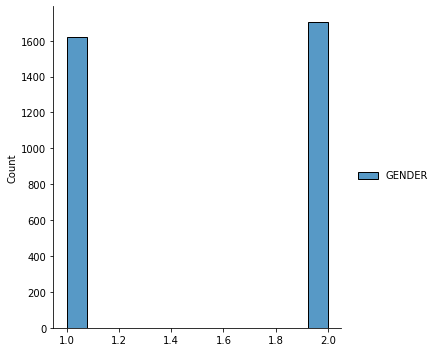

In [ ]:
import seaborn as sns
# We check the distribution of gender to make sure both sexes are represented equally throughout the dataset
sns.displot(df.loc[:, ['GENDER']])

First we visualise the distribution of sex in our dataset and we can see from the result, it's about 50/50. Each sex has around 1600 lines of data. This means the model will not be biased in this regard.

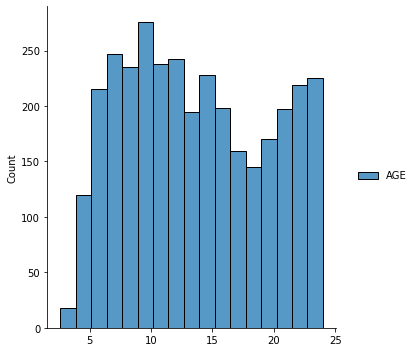

In [ ]:
# We check the distribution of age to visualize what ages the model will be able to potentially predict 
sns.displot(df.loc[:, ['AGE']])

As the age distribution, we can see the oldest are less than 25, youngest are around 2 years old. All ages, except around 2 years old, have more than 100 data. Even if this is not as well distributed as the gender, we will leave it as is because it is not overly biased and, due to the domain, it could potentially be irresponsable to fill in data through another AI or technique.

In [ ]:
from sklearn.model_selection import train_test_split
# We take a sample of only 1000 rows of data, due to resource restrictions in Google Colab.
df1 = df.sample(n=1000, axis=0)

# We split the data in testing and training, with a standard 25% dedicated to testing and 75% dedicated to training (the default from sklearn).
x_train, x_test, y_train, y_test = train_test_split (df1.loc[:, ['GENDER','I1','I2','C','PM1','PM2','M1','M2','38','18','28','48']], df1.loc[:, ['AGE']], test_size=0.25)

# We unravel the values into the result variables
y_train = y_train.values
y_test = y_test.values

# We show the shape of the resulting training dataset
print(x_train.shape)
print(y_train.shape)

(750, 12)
(750, 1)


In [ ]:
# We now process the datasets (both training and testing) with the functions defined in the function definition section
x_train = img_process(x_train)
x_test = img_process(x_test)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


# Model experimentation

We recommend, if the re-running of this section is considered, to do it block by block and reloading the page inbetween, so to as not run out of memory.

## Architecture

### General architecture

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 120, 120, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 60, 60, 32)        128       
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 60, 60, 64)        256       
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 60, 64)       

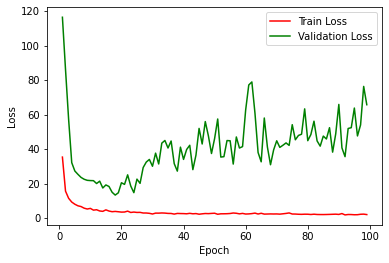

In [ ]:
from keras import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
from keras.optimizers import Adam

# We start from a general CNN architecture, with 3 convoluted layers and one dense layer. 
# We also will use batch normalization in between the convoluted layers, a dropout of 25% and an alternation of max pooling in between convoluted layers 
# We will use arbitrary values for the parameters, because they will be optimized later.
# We will also use the ADAM optimizer at first, but this function will be optimized in a later stage of this experimentation.


# Model creation
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(120,120,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='linear'))

# Model summary display
model.summary()

# Optimizer declaration
adam = Adam(learning_rate=1e-4, decay=1e-6)

# Model train and test
train_test_model(model, adam, x_train, y_train, (x_test, y_test))


### Improvement of general architecture

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 120, 120, 32)      896       
_________________________________________________________________
batch_normalization_18 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_24 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 120, 120, 32)      9248      
_________________________________________________________________
batch_normalization_19 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_25 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 120, 120, 32)     

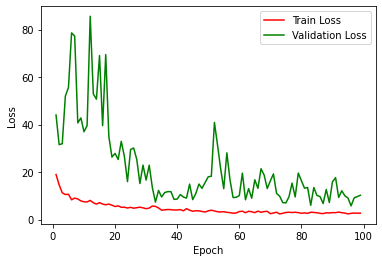

In [ ]:
from keras import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
from keras.optimizers import Adam

# Then we try to add more convoluted layers and more dense layers to get more information 
# as suggested in the following guide (https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-ii-hyper-parameter-42efca01e5d7)
# And since the number of weights of first dense layer are by far less than the flatten layer, we increased the number and put one more dense layer to get more information

# Model creation
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(120,120,3)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(8192, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='linear'))

# Model summary display
model.summary()

# Optimizer declaration
adam = Adam(learning_rate=1e-4, decay=1e-6)

# Model train and test
train_test_model(model, adam, x_train, y_train, (x_test, y_test))

### Tweek of architecture and activation functions

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_44 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 60, 60, 32)       

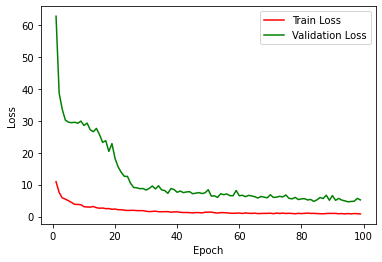

In [ ]:
from keras import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization, LeakyReLU
from keras.optimizers import Adam

# But at some point the loss is not getting any lower, and as per the suggestion of this article
# https://stats.stackexchange.com/questions/335836/cnn-architectures-for-regression
# We reduce the number of layers and also, change the activation function in dense layer to tanh (as the next article suggests)
# https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/

# Model creation
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='linear'))

# Model summary display
model.summary()

# Optimizer declaration
adam = Adam(learning_rate=1e-4, decay=1e-6)

# Model train and test
train_test_model(model, adam, x_train, y_train, (x_test, y_test))

## Data experimentation

### Data re-declaration and first set

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
# Change this to the location of the CSV file 
df = pd.read_csv('/content/drive/MyDrive/orig/data.csv', sep=';')

# We take a sample of only 1000 rows of data, due to resource restrictions in Google Colab.
df = df.sample(n=1000, axis=0)

# We split the data in testing and training, with a standard 25% dedicated to testing and 75% dedicated to training (the default from sklearn).
x_train, x_test, y_train, y_test = train_test_split (df.loc[:, ['GENDER','I1','I2','C','PM1','PM2','M1','M2','38','18','28','48']], df.loc[:, ['AGE']], test_size=0.25)

# We unravel the values into the result variables
y_train = y_train.values
y_test = y_test.values

# We show the shape of the resulting training dataset
print(x_train.shape)
print(y_train.shape)

# First set of data
# All teeth taken into account
x_train_processed = img_process(x_train)
x_test_processed = img_process(x_test)



(750, 12)
(750, 1)
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
2

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 120, 120, 32)      128       
_________________________________________________________________
dropout (Dropout)            (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)        0

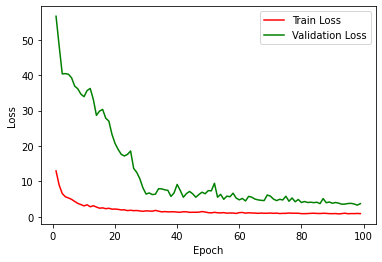

In [ ]:
from keras import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization, LeakyReLU
from keras.optimizers import Adam

# Model creation
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='linear'))

# Model summary display
model.summary()

# Optimizer declaration
adam = Adam(learning_rate=1e-4, decay=1e-6)

# Model train and test
train_test_model(model, adam, x_train_processed, y_train, (x_test_processed, y_test))

### Second set

In [ ]:
# Data and model 2
# Only important teeth taken into account (sex since it matters on the size of the teeth https://www.hindawi.com/journals/tswj/2018/7641908/,
#, incisive since when they start they are like a saw, molars since the presence of amalgam may be there, wisdom teeth since they indicate age)
x_train_imp = img_process_only_important(x_train)
x_test_imp = img_process_only_important(x_test)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 90, 120, 32)       896       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 90, 120, 32)       0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 90, 120, 32)       128       
_________________________________________________________________
dropout_8 (Dropout)          (None, 90, 120, 32)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 120, 32)       9248      
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 90, 120, 32)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 45, 60, 32)       

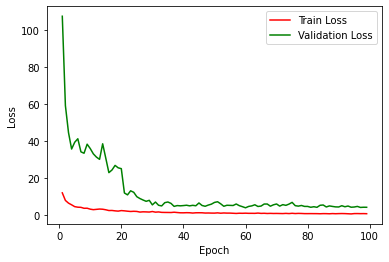

In [ ]:

# Model creation
model_imp = Sequential()
model_imp.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(90,120,3)))
model_imp.add(LeakyReLU(alpha=0.1))
model_imp.add(BatchNormalization())
model_imp.add(Dropout(0.25))

model_imp.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model_imp.add(LeakyReLU(alpha=0.1))
model_imp.add(MaxPool2D(pool_size=(2,2)))
model_imp.add(BatchNormalization())
model_imp.add(Dropout(0.25))

model_imp.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model_imp.add(LeakyReLU(alpha=0.1))
model_imp.add(BatchNormalization())
model_imp.add(Dropout(0.25))

model_imp.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model_imp.add(LeakyReLU(alpha=0.1))
model_imp.add(MaxPool2D(pool_size=(2,2)))
model_imp.add(BatchNormalization())
model_imp.add(Dropout(0.25))

model_imp.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model_imp.add(LeakyReLU(alpha=0.1))
model_imp.add(BatchNormalization())
model_imp.add(Dropout(0.25))

model_imp.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model_imp.add(LeakyReLU(alpha=0.1))
model_imp.add(MaxPool2D(pool_size=(2,2)))
model_imp.add(BatchNormalization())
model_imp.add(Dropout(0.25))

model_imp.add(Flatten())

model_imp.add(Dense(8192, activation='tanh'))
model_imp.add(Dropout(0.25))

model_imp.add(Dense(512, activation='tanh'))
model_imp.add(Dropout(0.25))

model_imp.add(Dense(1, activation='linear'))

# Model summary display
model_imp.summary()

# Optimizer declaration
adam = Adam(learning_rate=1e-4, decay=1e-6)

# Model train and test
train_test_model(model_imp, adam, x_train_imp, y_train, (x_test_imp, y_test))

Since the results are close, we will use the full dataset just to be sure that we are not missing anything.

## Testing optimizers 

We will test the optimizers proposed in [this article](https://ruder.io/optimizing-gradient-descent/index.html#gradientdescentoptimizationalgorithms).

### SGD

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_24 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 60, 60, 32)       

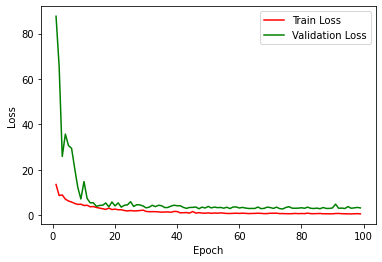

In [ ]:
from keras.optimizers import SGD

# Model creation
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='linear'))

# Model summary display
model.summary()

#SGD with momentum of 0.9
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=False, name="SGD", clipnorm=1)

# Model train and test
train_test_model(model, sgd, x_train_processed, y_train, (x_test_processed, y_test))


### SGD with Nestov Accelerated Gradient

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_32 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 60, 60, 32)       

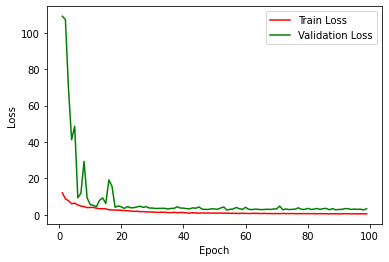

In [ ]:
from keras.optimizers import SGD

# Model creation
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='linear'))

# Model summary display
model.summary()

#SGD with momentum of 0.9 and Nesterov accelerated gradient 
sgd_2 = SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD", clipnorm=1)

# Model train and test
train_test_model(model, sgd_2, x_train_processed, y_train, (x_test_processed, y_test))


### Adagrad

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_30 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_40 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_31 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 60, 60, 32)       

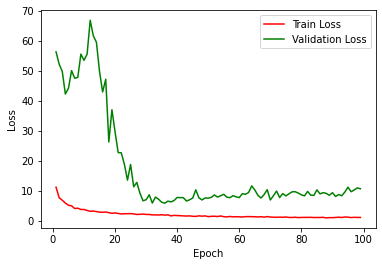

In [ ]:
from keras.optimizers import Adagrad

# Model creation
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='linear'))

# Model summary display
model.summary()

#Adagrad with default values
adag = Adagrad(
    learning_rate=0.001,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name="Adagrad")

# Model train and test
train_test_model(model, adag, x_train_processed, y_train, (x_test_processed, y_test))

### Adadelta

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_36 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_36 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_48 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_37 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 60, 60, 32)       

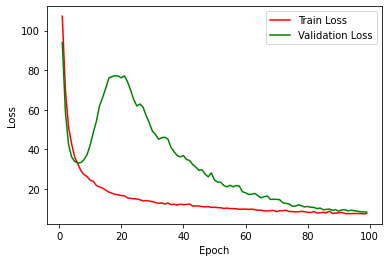

In [ ]:
from keras.optimizers import Adadelta
from keras import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization, LeakyReLU

# Model creation
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='linear'))

# Model summary display
model.summary()

#Adadelta with rho of 0.9
adad = Adadelta(
    learning_rate=0.001, rho=0.9, epsilon=1e-07, name="Adadelta")

# Model train and test
train_test_model(model, adad, x_train_processed, y_train, (x_test_processed, y_test))

### RMSprop

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 120, 120, 32)      128       
_________________________________________________________________
dropout (Dropout)            (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)       

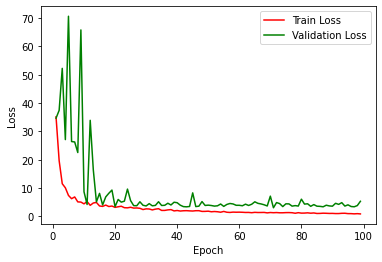

In [ ]:
from keras.optimizers import RMSprop

# Model creation
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='linear'))

# Model summary display
model.summary()

#RMSprop with rho of 0.9
rms = RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop",)

# Model train and test
train_test_model(model, rms, x_train_processed, y_train, (x_test_processed, y_test))

### Adamax

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_8 (Dropout)          (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 60, 60, 32)       

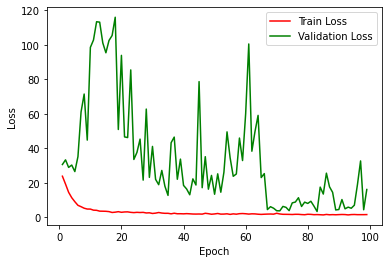

In [ ]:
from keras.optimizers import Adamax

# Model creation
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='linear'))

# Model summary display
model.summary()

#Adamax with learning rate 0.002, beta1 0.9, beta2 0.999 and epsilon 1e-07
adamax = Adamax(
    learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax")

# Model train and test
train_test_model(model,  adamax, x_train_processed, y_train, (x_test_processed, y_test))

### Nadam

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_16 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 60, 60, 32)       

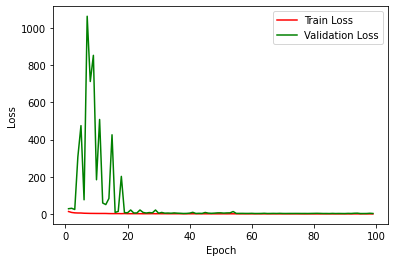

In [ ]:
from keras.optimizers import Nadam

# Model creation
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='linear'))

# Model summary display
model.summary()

#Nadam
nadam = Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam")

# Model train and test
train_test_model(model, nadam, x_train_processed, y_train, (x_test_processed, y_test))

### Adam

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_24 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 60, 60, 32)       

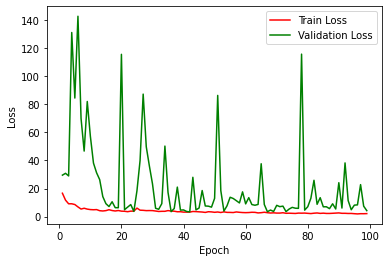

In [ ]:
from keras.optimizers import Adam

# Model creation
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='linear'))

# Model summary display
model.summary()

#Adam with asmgrad
asmgrad = Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=True,
    name="Adam"
    )

# Model train and test
train_test_model(model, asmgrad, x_train_processed, y_train, (x_test_processed, y_test))

### Result

The best one is SGD with momentum of 0.9 and Nesterov accelerated gradient. Now we try changing the dropout amount.

## Dropout experimentation

 As [this paper](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf) and [this paper](https://proceedings.neurips.cc/paper/2013/file/71f6278d140af599e06ad9bf1ba03cb0-Paper.pdf) suggest, 0.5 dropout is the best. However we will try with 0.25 - 0.35 - 0.45 - 0.5 - 0.55 - 0.65 and 0.75.

### 0.25 Dropout

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_32 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 60, 60, 32)       

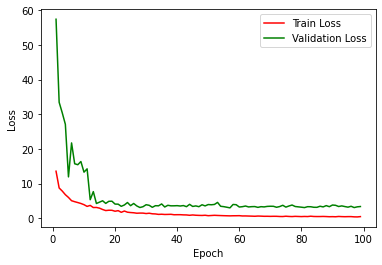

In [ ]:
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization, LeakyReLU
from keras.optimizers import SGD

# Model creation
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='linear'))

# Model summary display
model.summary()


#SGD with momentum of 0.9 and Nesterov accelerated gradient 
sgd_2 = SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD", clipnorm=1)

# Model train and test
train_test_model(model, sgd_2, x_train_processed, y_train, (x_test_processed, y_test))


### 0.35 Dropout

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_30 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_40 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_31 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 60, 60, 32)       

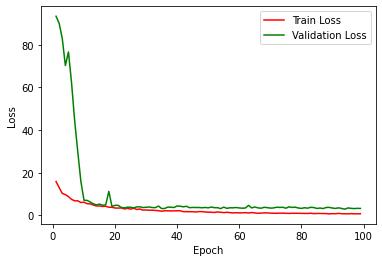

In [ ]:
from keras.optimizers import SGD

# Model creation
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.35))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.35))

model.add(Dense(1, activation='linear'))

# Model summary display
model.summary()

# SGD with momentum of 0.9 and Nesterov accelerated gradient 
sgd_2 = SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD", clipnorm=1)

# Model train and test
train_test_model(model, sgd_2, x_train_processed, y_train, (x_test_processed, y_test))


### 0.45 Dropout

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_36 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_36 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_48 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_37 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 60, 60, 32)       

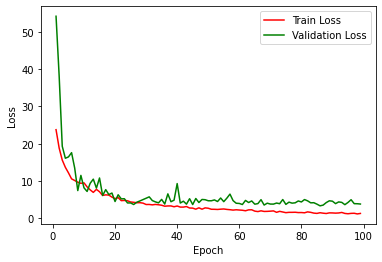

In [ ]:
from keras.optimizers import SGD

# Model creation
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.45))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.45))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.45))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.45))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.45))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.45))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.45))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.45))

model.add(Dense(1, activation='linear'))

# Model summary display
model.summary()

#SGD with momentum of 0.9 and Nesterov accelerated gradient 
sgd_2 = SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD", clipnorm=1)

# Model train and test
train_test_model(model, sgd_2, x_train_processed, y_train, (x_test_processed, y_test))


 ### 0.5 Dropout

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 120, 120, 32)      128       
_________________________________________________________________
dropout (Dropout)            (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)        0

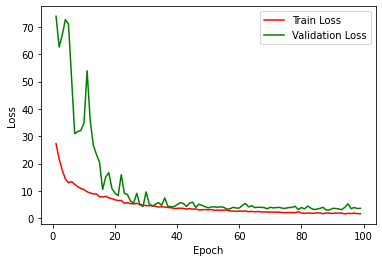

In [ ]:
from keras.optimizers import SGD

# Model creation
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='linear'))

# Model summary display
model.summary()

#SGD with momentum of 0.9 and Nesterov accelerated gradient 
sgd_2 = SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD", clipnorm=1)

# Model train and test
train_test_model(model, sgd_2, x_train_processed, y_train, (x_test_processed, y_test))


### 0.55 Dropout

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_8 (Dropout)          (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 60, 60, 32)       

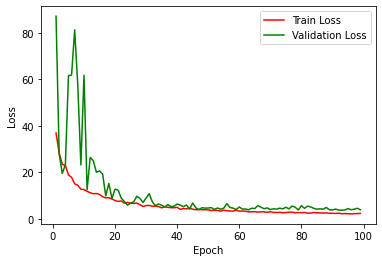

In [ ]:
from keras.optimizers import SGD

# Model creation
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.55))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.55))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.55))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.55))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.55))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.55))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.55))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.55))

model.add(Dense(1, activation='linear'))

# Model summary display
model.summary()

# SGD with momentum of 0.9 and Nesterov accelerated gradient 
sgd_2 = SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD", clipnorm=1)

# Model train and test
train_test_model(model, sgd_2, x_train_processed, y_train, (x_test_processed, y_test))


### 0.65 Dropout

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_16 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 60, 60, 32)       

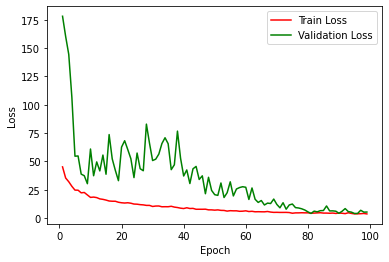

In [ ]:
from keras.optimizers import SGD

# Model creation
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.65))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.65))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.65))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.65))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.65))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.65))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.65))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.65))

model.add(Dense(1, activation='linear'))

# Model summary display
model.summary()

# SGD with momentum of 0.9 and Nesterov accelerated gradient 
sgd_2 = SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD", clipnorm=1)

# Model train and test
train_test_model(model, sgd_2, x_train_processed, y_train, (x_test_processed, y_test))


### 0.75 Dropout

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_24 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 60, 60, 32)       

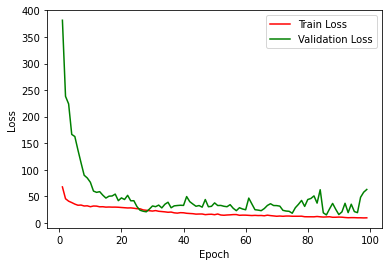

In [ ]:
from keras.optimizers import SGD

# Model creation
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.75))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.75))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.75))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.75))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.75))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.75))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.75))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.75))

model.add(Dense(1, activation='linear'))

# Model summary display
model.summary()

# SGD with momentum of 0.9 and Nesterov accelerated gradient 
sgd_2 = SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD", clipnorm=1)

# Model train and test
train_test_model(model, sgd_2, x_train_processed, y_train, (x_test_processed, y_test))


### Result

The decision was made to take 0.5 dropout, since the loss is 2 which is still low and we rest assured the model is not overfitted, as per the recommendations of the papers.

## Kernel size

We now test kernel size and following [this paper's](https://www.osti.gov/servlets/purl/1631245#:~:text=Typically%2C%20convolutional%20layer%20kernel%20sizes,CNN%20found%20kernel%20sizes%20of) recommendations we will test one, three, five and ten kernel sizes.

### 1X1 Kernel size

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 120, 120, 32)      128       
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_32 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 120, 120, 32)      1056      
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 60, 60, 32)       

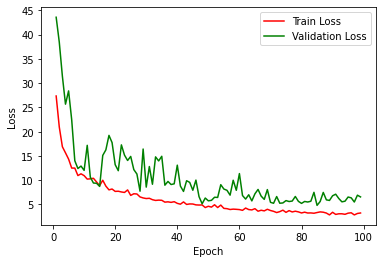

In [ ]:
from keras.optimizers import SGD

# Model creation
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(1, 1), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(1, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(1, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(1, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(1, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(1, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='linear'))

# Model summary display
model.summary()

#SGD with momentum of 0.9 and Nesterov accelerated gradient 
sgd_2 = SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD", clipnorm=1)

# Model train and test
train_test_model(model, sgd_2, x_train_processed, y_train, (x_test_processed, y_test))


### 3X3 Kernel size

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 120, 120, 32)      896       
_________________________________________________________________
leaky_re_lu_30 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_40 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 120, 120, 32)      9248      
_________________________________________________________________
leaky_re_lu_31 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 60, 60, 32)       

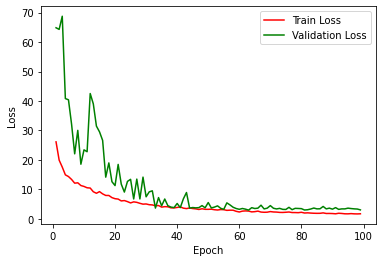

In [ ]:
from keras.optimizers import SGD

# Model creation
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='linear'))

# Model summary display
model.summary()

#SGD with momentum of 0.9 and Nesterov accelerated gradient 
sgd_2 = SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD", clipnorm=1)

# Model train and test
train_test_model(model, sgd_2, x_train_processed, y_train, (x_test_processed, y_test))


### 5x5 Kernel size

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 120, 120, 32)      2432      
_________________________________________________________________
leaky_re_lu_36 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_36 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_48 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 120, 120, 32)      25632     
_________________________________________________________________
leaky_re_lu_37 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 60, 60, 32)       

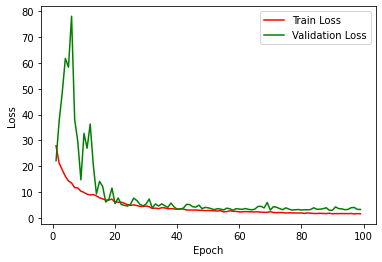

In [ ]:
from keras.optimizers import SGD

# Model creation
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(5,5), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(5,5), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='linear'))

# Model summary display
model.summary()

# SGD with momentum of 0.9 and Nesterov accelerated gradient 
sgd_2 = SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD", clipnorm=1)

# Model train and test
train_test_model(model, sgd_2, x_train_processed, y_train, (x_test_processed, y_test))


### 9X9 Kernel size

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 120, 120, 32)      7808      
_________________________________________________________________
leaky_re_lu_42 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
batch_normalization_42 (Batc (None, 120, 120, 32)      128       
_________________________________________________________________
dropout_56 (Dropout)         (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 120, 120, 32)      82976     
_________________________________________________________________
leaky_re_lu_43 (LeakyReLU)   (None, 120, 120, 32)      0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 60, 60, 32)       

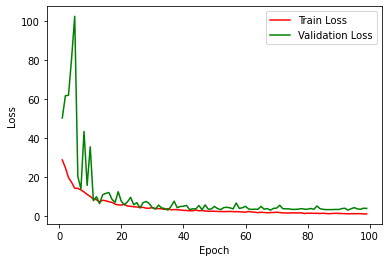

In [ ]:
from keras.optimizers import SGD

# Model creation
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(9,9), padding='same', input_shape=(120,120,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(9,9), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(9,9), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(9,9), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(9,9), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(9,9), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(8192, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='linear'))

# Model summary display
model.summary()

#SGD with momentum of 0.9 and Nesterov accelerated gradient 
sgd_2 = SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD", clipnorm=1)

# Model train and test
train_test_model(model, sgd_2, x_train_processed, y_train, (x_test_processed, y_test))


### Results

Even though the 9x9 filter seems to be better in our training data, the testing loss is better in the 3X3 filter, so we will keep that one.